<a href="https://colab.research.google.com/github/minhcong00/BT_AI/blob/main/NhanDang_BIEUCAMKHUONMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LInk tập data: https://drive.google.com/drive/folders/1wgj571MdilmfPNc-jCx6yrRIzuBFC9gH?usp=share_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#KHAI BÁO THƯ VIỆN
#Khai báo thư viện để lọc ảnh
from os import listdir
from numpy import asarray,save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
#Khai báo thư viện tách tập dữ liệu thành 2 tập train và test
from sklearn.model_selection import train_test_split
#Khai báo thư viện tính ma trận cho ảnh và vẽ đồ thị ảnh                                                                                                                                                                                                                                                                                                 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
#Khai báo thư viện chuyển từ 1 vector thành nhị phân
from keras.utils import to_categorical
#Khai báo thư viện của các hàm bộ lọc, mạng ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.optimizers import Adam
from keras.layers import LeakyReLU
#Khai báo thư viện học cho Model
from keras.losses import categorical_crossentropy

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/data/BIEUCAMKHUONMAT/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('buon'):
    output = 0.0
  if file.startswith('ghetom'):
    output = 1.0
  if file.startswith('ngacnhien'):
    output = 2.0
  if file.startswith('sohai'):
    output = 3.0
  if file.startswith('tucgian'):
    output = 4.0
  if file.startswith('vuive'):
    output = 5.0
  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('/content/drive/MyDrive/Colab Notebooks/data/bc_photo.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/data/bc_label.npy', labels)

(1085, 150, 150, 3) (1085,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos,labels,test_size=0.3, random_state=5)# tập dữ liệu được chia 70% train và 30% test
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(759, 150, 150, 3) (326, 150, 150, 3)
(759,) (326,)


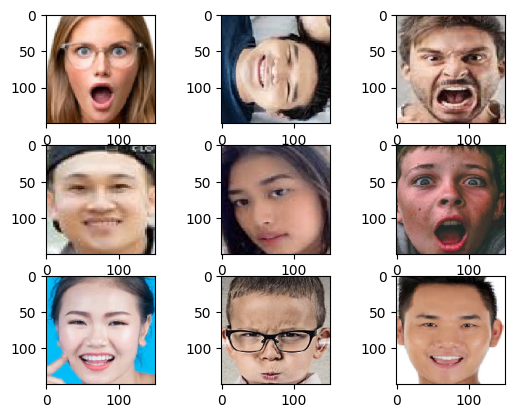

In [ ]:
x_train_show =x_train.astype(int)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
x_train = x_train.reshape(759, 150, 150, 3)
x_train = x_train.astype('float32')/255 
x_test = x_test.reshape(326, 150, 150, 3)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(759, 150, 150, 3) (759, 6) (326, 150, 150, 3) (326, 6)


In [ ]:
#Khai báo giá trị kích thước, số lần học, số lớp
batch_size = 10
epochs = 70
classes = 6
#Tạo các lớp cho model
model = Sequential()
#Có 4 CNN
#tích chập 32 lần
model.add(Conv2D(64, kernel_size = (3,3), activation = 'linear',input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tích chập 128 lần
model.add(Conv2D(128, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tích chập 512 lần
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tích chập 1024 lần
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 75, 75, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 128)      0         
 2D)                                                  

In [ ]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = batch_size ,epochs = epochs, verbose = 1, validation_data=(x_test,y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac', test_acc)
print('Do mat mat', test_loss)

Epoch 1/70
76/76 [==============================] - 5s 57ms/step - loss: 2.1031 - accuracy: 0.1713 - val_loss: 1.7696 - val_accuracy: 0.1963
Epoch 2/70
76/76 [==============================] - 4s 51ms/step - loss: 2.7956 - accuracy: 0.2161 - val_loss: 6.9297 - val_accuracy: 0.2147
Epoch 3/70
76/76 [==============================] - 4s 51ms/step - loss: 3.0974 - accuracy: 0.2121 - val_loss: 1.7083 - val_accuracy: 0.2638
Epoch 4/70
76/76 [==============================] - 4s 51ms/step - loss: 1.7870 - accuracy: 0.2569 - val_loss: 1.6680 - val_accuracy: 0.3037
Epoch 5/70
76/76 [==============================] - 4s 51ms/step - loss: 1.6839 - accuracy: 0.3149 - val_loss: 1.6367 - val_accuracy: 0.3129
Epoch 6/70
76/76 [==============================] - 4s 52ms/step - loss: 1.6555 - accuracy: 0.3281 - val_loss: 1.6910 - val_accuracy: 0.2607
Epoch 7/70
76/76 [==============================] - 4s 52ms/step - loss: 1.6264 - accuracy: 0.3505 - val_loss: 1.6720 - val_accuracy: 0.3466
Epoch 8/70
76

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/data/modelNhandangBieucamkhuonmat.h5')

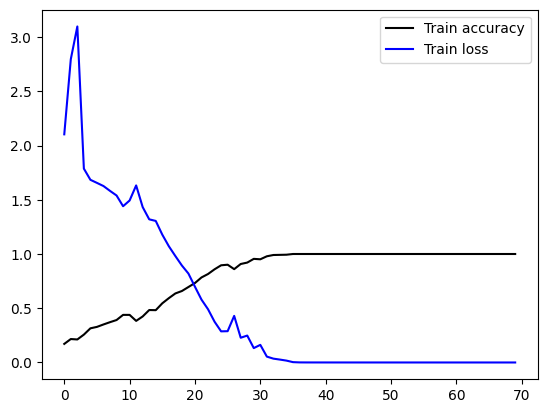

In [ ]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/data/modelNhandangBieucam.h5")

Mounted at /content/drive


1/1 [==============================] - 0s 28ms/step
Giá trị: 0
1/1 [==============================] - 0s 29ms/step
buon
1/1 [==============================] - 0s 52ms/step


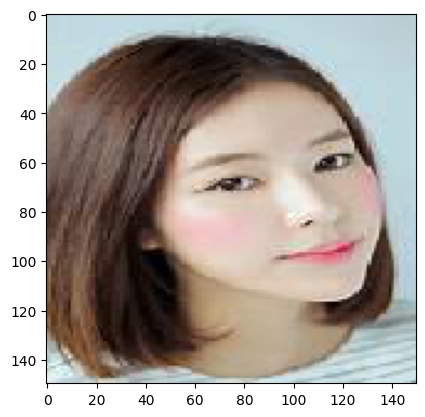

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/10.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')

1/1 [==============================] - 0s 19ms/step
Giá trị: 3
1/1 [==============================] - 0s 26ms/step
sohai
1/1 [==============================] - 0s 29ms/step


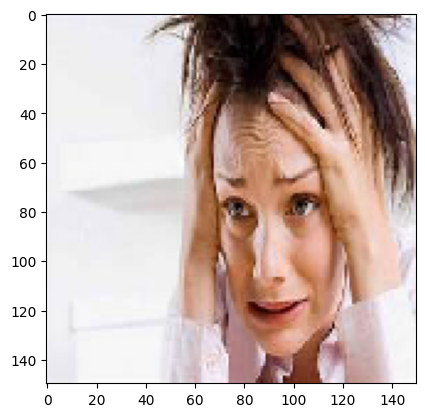

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/13.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')

1/1 [==============================] - 0s 20ms/step
Giá trị: 5
1/1 [==============================] - 0s 20ms/step
vuive


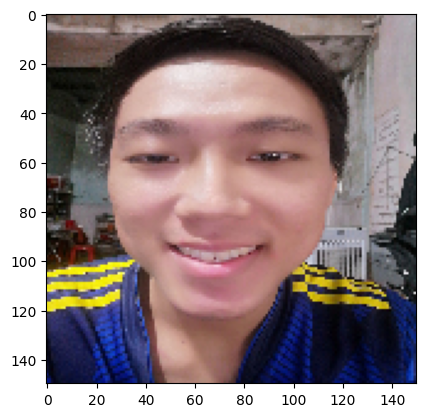

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/2.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')

1/1 [==============================] - 0s 38ms/step
Giá trị: 3
1/1 [==============================] - 0s 19ms/step
sohai
1/1 [==============================] - 0s 30ms/step


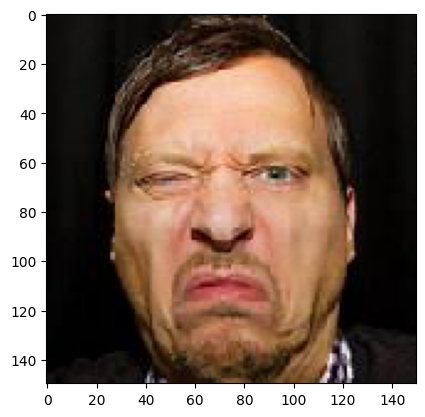

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/14.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')

1/1 [==============================] - 0s 18ms/step
Giá trị: 2
1/1 [==============================] - 0s 19ms/step
ngacnhien
1/1 [==============================] - 0s 20ms/step


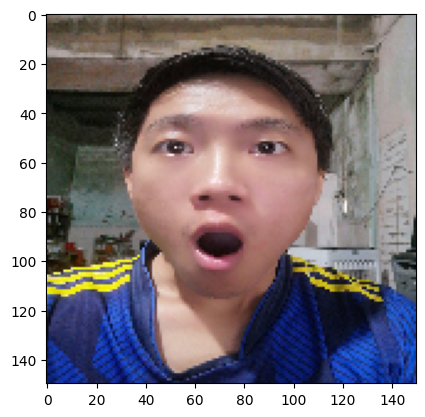

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/5.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')

1/1 [==============================] - 0s 25ms/step
Giá trị: 5
1/1 [==============================] - 0s 17ms/step
vuive


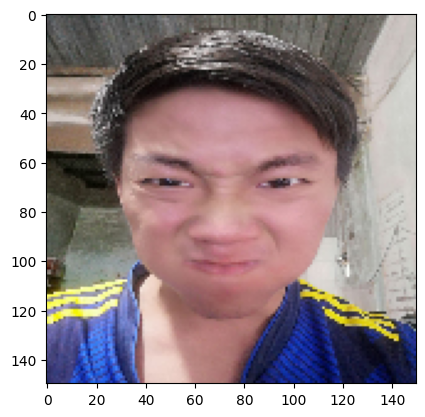

In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/3.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('buon')
if np.argmax(model.predict(img)) == 1:
   print('ghetom')
if np.argmax(model.predict(img)) == 2:
   print('ngacnhien')
if np.argmax(model.predict(img)) == 3:
   print('sohai')
if np.argmax(model.predict(img)) == 4:
   print('tucgian')
if np.argmax(model.predict(img)) == 5:
   print('vuive')